DSC 241 Homework 1- Problem 2

In [ ]:
# Install some required packages for 04cars dataset
!apt-get install -y r-base
!R -e "install.packages('openintro')"

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import rpy2.robjects as ro
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load cars dataset
ro.r('library(openintro)')
ro.r('data(cars04)')

# Read in cars dataset as R object
cars04_r = ro.r['cars04']

# Convert into pandas df
cars04_df = pd.DataFrame(cars04_r)
cars04_df = cars04_df.T # DF is flipped
cars04_df.columns = cars04_r.colnames # Assign col names
cars04_df.head()

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
0,Chevrolet Aveo 4dr,False,False,False,False,False,False,False,11690,10965,1.6,4,103,28,34,2370,98,167,66
1,Chevrolet Aveo LS 4dr hatch,False,False,False,False,False,False,False,12585,11802,1.6,4,103,28,34,2348,98,153,66
2,Chevrolet Cavalier 2dr,False,False,False,False,False,False,False,14610,13697,2.2,4,140,26,37,2617,104,183,69
3,Chevrolet Cavalier 4dr,False,False,False,False,False,False,False,14810,13884,2.2,4,140,26,37,2676,104,183,68
4,Chevrolet Cavalier LS 2dr,False,False,False,False,False,False,False,16385,15357,2.2,4,140,26,37,2617,104,183,69


In [ ]:
# Replace R object nan values
cars04_df.replace({ro.r('NA_integer_'): np.nan,
                   ro.r('NA_real_'): np.nan,
                   ro.r('NA_complex_'): np.nan,
                   ro.r('NA_character_'): np.nan}, inplace=True)

In [ ]:
def confband(X, y, conf=0.95):

  # Set intercept and slope of least squares line
  coefficients, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
  intercept = coefficients[0]
  slope = coefficients[1]
  n = len(X)

  # Beta hat
  beta = np.array([intercept, slope]).reshape(-1,1)
  beta_hat = np.linalg.inv(X.T@X)@X.T@y

  # Least squares line
  x = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), n)
  x = x.reshape(-1, 1)
  x = np.hstack((np.ones((x.shape[0], 1)), x))
  y = y.reshape(-1, 1)
  y_hat = X@beta_hat
  y_pred = x@beta_hat

  # Create pointwise confidence band
  alpha = 1 - conf
  # t value
  t_val = stats.t.ppf(1 - alpha/2, df=n - 2)

  # Standard Error
  sigma_hat = np.sum((y - y_hat)**2) / (n-2)

  SE_hat = np.array([
      np.sqrt(sigma_hat * x_row @ np.linalg.inv(X.T@X) @ x_row.T)
      for x_row in x
  ])
  upper_band = y_pred + (t_val * SE_hat)
  lower_band = y_pred - (t_val * SE_hat)

  # Create simulateneous band
  sim_t_val = stats.t.ppf(1 - alpha/(2*n), df=n - 2)
  sim_upper_band = y_pred + (sim_t_val * SE_hat)
  sim_lower_band = y_pred - (sim_t_val * SE_hat)

  # Plot least squares line and confidence bands
  plt.plot(x[:,1], y_pred, label='Least Squares Line')
  plt.scatter(X[:,1], y, label = 'True Data')
  plt.plot(x[:,1], upper_band, label = 'Pointwise Upper band')
  plt.plot(x[:,1], lower_band, label = 'Pointwise Lower band')
  plt.plot(x[:,1], sim_upper_band, label = 'Simultaneous Upper band')
  plt.plot(x[:,1], sim_lower_band, label = 'Simultaneous Lower band')
  plt.legend()
  plt.xlim(0, 75)
  plt.ylim(-200, 800)
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.title('Horsepower Predicted by MPG')
  plt.show()




In [ ]:
subset = cars04_df[['hwy_mpg', 'horsepwr']]
subset = subset.dropna()
subset

,hwy_mpg,horsepwr
0,34.0,103
1,34.0,103
2,37.0,140
3,37.0,140
4,37.0,140
...,...,...
423,18.0,305
424,28.0,165
425,27.0,142
426,20.0,190


In [ ]:
# Transform columns into numpy arrays
x = subset['hwy_mpg'].values
x = x.reshape(-1, 1)
# Add intercept to x
x = np.hstack((np.ones((x.shape[0], 1)), x))
print(x.shape)
y = subset['horsepwr'].values
print(y.shape)

(414, 2)
(414,)


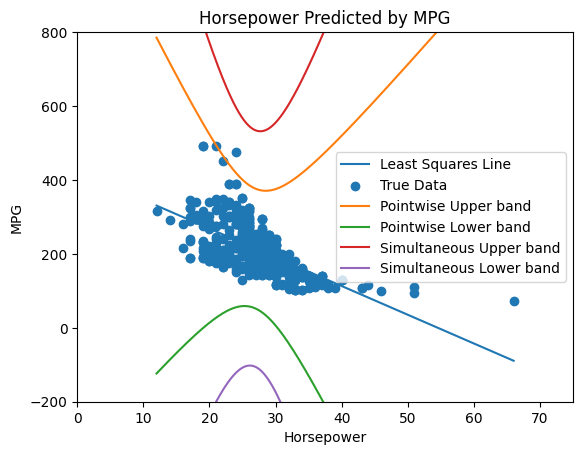

In [ ]:
confband(x, y)